# pore_size_distribution

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

ps.visualization.set_mpl_style()
np.random.seed(10)

## Genearate image for testing

  0%|          | 0/25 [00:00<?, ?it/s]

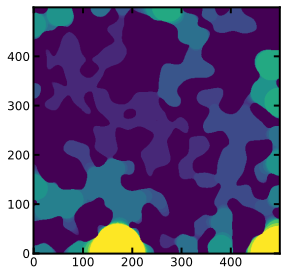

In [2]:
im = ps.generators.blobs(shape=[500, 500])
im = ps.filters.porosimetry(im)

fig, ax = plt.subplots()
ax.imshow(im, origin="lower");

## Apply metric function

Output is a tuple with the elements R, pdf, cdf, satn, bin_centers, bin_edges, and bin_widths

### default

In [3]:
x = ps.metrics.pore_size_distribution(im=im)

Plot results:

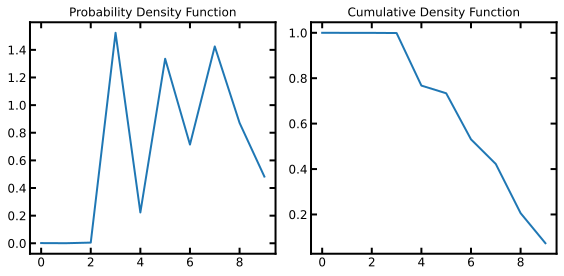

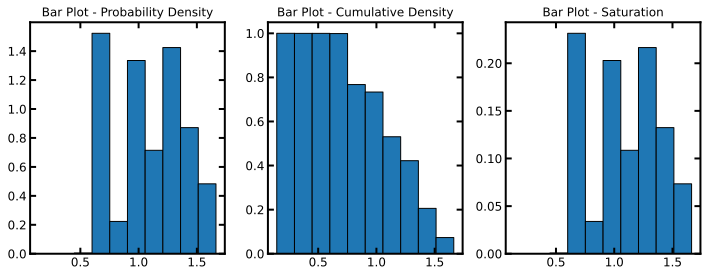

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].bar(x.bin_centers, x.pdf, x.bin_widths, edgecolor='k')
ax[1].bar(x.bin_centers, x.cdf, x.bin_widths, edgecolor='k')
ax[2].bar(x.bin_centers, x.satn, x.bin_widths, edgecolor='k')
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation');

### bins

In [5]:
x = ps.metrics.pore_size_distribution(im=im, bins=5)

Plot results:

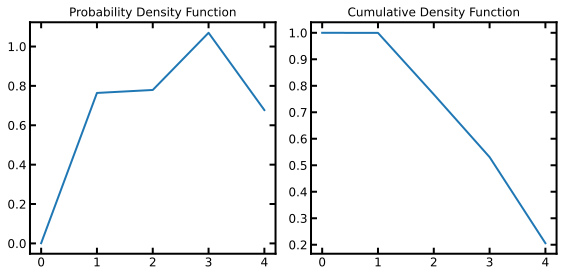

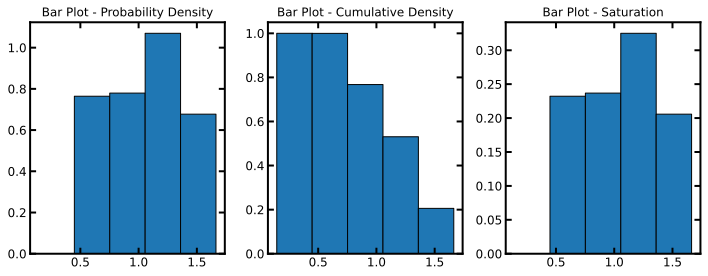

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].bar(x.bin_centers, x.pdf, x.bin_widths, edgecolor='k')
ax[1].bar(x.bin_centers, x.cdf, x.bin_widths, edgecolor='k')
ax[2].bar(x.bin_centers, x.satn, x.bin_widths, edgecolor='k')
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation');

### log

In [7]:
x = ps.metrics.pore_size_distribution(im=im, log=False)

Plot results:

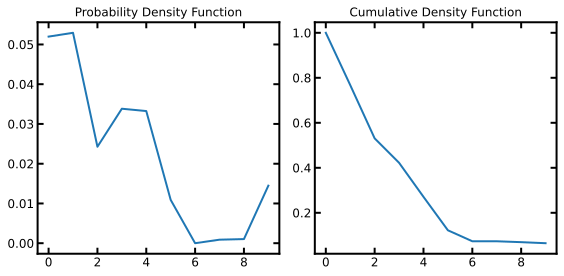

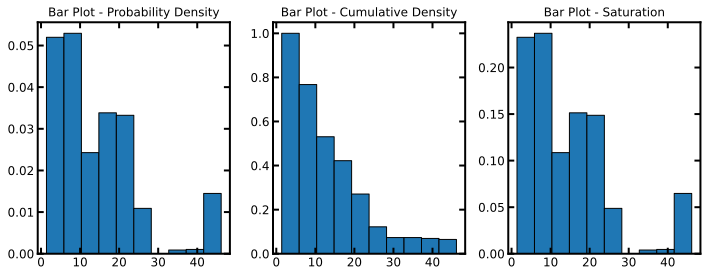

In [8]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].bar(x.bin_centers, x.pdf, x.bin_widths, edgecolor='k')
ax[1].bar(x.bin_centers, x.cdf, x.bin_widths, edgecolor='k')
ax[2].bar(x.bin_centers, x.satn, x.bin_widths, edgecolor='k')
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation');

### voxel_size

In [9]:
x = ps.metrics.pore_size_distribution(im=im, voxel_size=10)

Plot results:

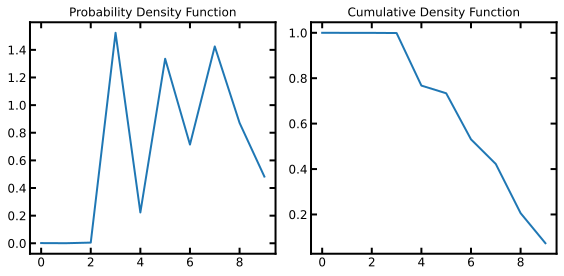

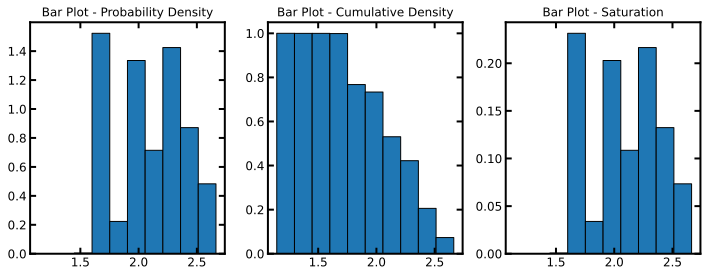

In [10]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].bar(x.bin_centers, x.pdf, x.bin_widths, edgecolor='k')
ax[1].bar(x.bin_centers, x.cdf, x.bin_widths, edgecolor='k')
ax[2].bar(x.bin_centers, x.satn, x.bin_widths, edgecolor='k')
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
ax[2].set_title('Bar Plot - Saturation');